### It has been well know that in the car world, more cylinders means more speed. But does that apply to acceleration though? And does the weight of the car affect the fuel consumption? Let's find out!
### In this notebook, we will explore:
- the relationship between the number of cylinders and the acceleration of a car.
- the correlation of the weight to the fuel consumption.

In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns
from scipy.stats import t 


filepath = 'Data/auto-mpg.csv'
df_auto = pd.read_csv(filepath)
df_auto.isnull().sum() # check for missing values
df_auto = df_auto.dropna() # drop missing values

In [273]:
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [274]:
# describe the cylinders column
df_auto['cylinders'].describe()

count    392.000000
mean       5.471939
std        1.705783
min        3.000000
25%        4.000000
50%        4.000000
75%        8.000000
max        8.000000
Name: cylinders, dtype: float64

In [275]:
df_auto['acceleration'].describe()

count    392.000000
mean      15.541327
std        2.758864
min        8.000000
25%       13.775000
50%       15.500000
75%       17.025000
max       24.800000
Name: acceleration, dtype: float64

### At a first glance we notice that the mean value (15.541327) is very close to the median value (15.5), and the standard deviation (2.758864) is not too high. This means that the data is not too spread out, thus we can assume that the data is symmetrically distributed.
### This is just a quick notice in case we needed this information later on.

<AxesSubplot: xlabel='cylinders', ylabel='acceleration'>

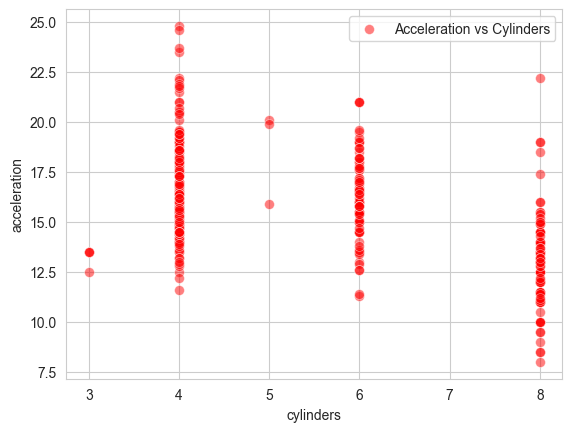

In [276]:
# scatter plot acceleration vs cylinders
sns.scatterplot(
    x="cylinders",
    y="acceleration",
    data=df_auto, 
    color="red",
    alpha=0.5, # transparency
    linewidth=0.5,
    s=50, # size of the marker
    label="Acceleration vs Cylinders"
)

### As we can see the difference is not as big as one might think. Especially between 4 and 6 cylinders. Cars with 8 cylinders dominate the interval of 7.5 to 12.5, still the sweet spot tends to be around 12.5 to 16.5 for all three categories(4, 6, 8 cylinders).
### A couple of outliers are worth mentioning also. We notice them at 3 and 5 cylinders. I will give that a closer look.

In [285]:
# 3 cylinder cars
df_3cyl = df_auto[df_auto['cylinders'] == 3]
df_3cyl

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
71,19.0,3,70.0,97.0,2330,13.5,72,japan,mazda rx2 coupe
111,18.0,3,70.0,90.0,2124,13.5,73,japan,maxda rx3
243,21.5,3,80.0,110.0,2720,13.5,77,japan,mazda rx-4
334,23.7,3,70.0,100.0,2420,12.5,80,japan,mazda rx-7 gs


In [286]:
# 5 cylinder cars
df_5cyl = df_auto[df_auto['cylinders'] == 5] 
df_5cyl

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
274,20.3,5,131.0,103.0,2830,15.9,78,europe,audi 5000
297,25.4,5,183.0,77.0,3530,20.1,79,europe,mercedes benz 300d
327,36.4,5,121.0,67.0,2950,19.9,80,europe,audi 5000s (diesel)


### As we can see, there are only 4 cars with 3 cylinders and 3 cars with 5 cylinders. So the best thing to do is to ignore this, since the data is rather small.

### Let's take a closer look to the mean in every category, and then finish this analysis with a confidence interval test. 

In [279]:
# get the mean value of acceleration
mean_acceleration = df_auto['acceleration'].mean()
print(f'The mean value of acceleration for all cars in this dataset is {mean_acceleration:.2f}.')

# get the mean value of acceleration for cars with 4 cylinders
mean_acceleration_4cyl = df_auto[df_auto['cylinders'] == 4]['acceleration'].mean()
print(f'The mean value of acceleration for cars with 4 cylinders is {mean_acceleration_4cyl:.2f}.')

# get the mean value of acceleration for cars with 6 cylinders
mean_acceleration_6cyl = df_auto[df_auto['cylinders'] == 6]['acceleration'].mean()
print(f'The mean value of acceleration for cars with 6 cylinders is {mean_acceleration_6cyl:.2f}.')

# get the mean value of acceleration for cars with 8 cylinders
mean_acceleration_8cyl = df_auto[df_auto['cylinders'] == 8]['acceleration'].mean()
print(f'The mean value of acceleration for cars with 8 cylinders is {mean_acceleration_8cyl:.2f}.')

The mean value of acceleration for all cars in this dataset is 15.54.
The mean value of acceleration for cars with 4 cylinders is 16.58.
The mean value of acceleration for cars with 6 cylinders is 16.25.
The mean value of acceleration for cars with 8 cylinders is 12.96.


<AxesSubplot: >

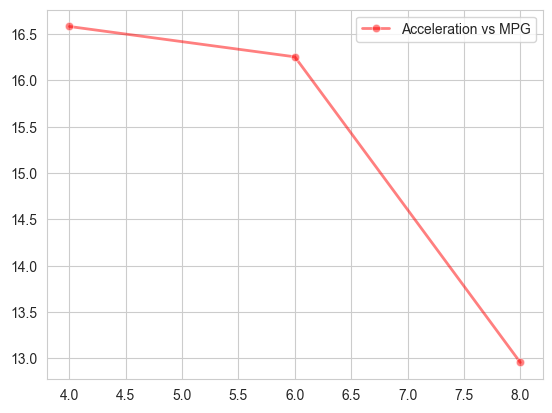

In [280]:
# line plot the mean acceleration for 4, 6, 8 cylinders
sns.lineplot(
    x=[4, 6, 8],
    y=[mean_acceleration_4cyl, mean_acceleration_6cyl, mean_acceleration_8cyl],
    color="red",
    alpha=0.5, 
    linewidth=2,
    marker="o",
    label="Acceleration vs MPG",
)

### Visually it is more noticible that the deficit between the mean value for acceleration between 4 and 6 cylinder is minimal.

In [281]:
mean = np.mean(df_auto["acceleration"])  # Calculate the mean
std = np.std(df_auto["acceleration"])  # Calculate the standard deviation of the sample
n = len(df_auto)  # Get the sample size

alpha = 0.05  # Set the confidence level
t_critical = t.ppf(1 - alpha / 2, n - 1)  # Calculate the critical t-value
sem = std / np.sqrt(n)  # Calculate the standard error of the mean
upper = mean + t_critical * sem  # Calculate the upper bound of the confidence interval
lower = mean - t_critical * sem  # Calculate the lower bound of the confidence interval

print(f'The 95% confidence interval for the mean of the "acceleration" column in the "df_auto" data frame is between {lower:.2f} and {upper:.2f}.')

The 95% confidence interval for the mean of the "acceleration" column in the "df_auto" data frame is between 15.27 and 15.81.


## Conclusion:
### Based on the results of the 95% confidence interval, we can conclude that the mean acceleration for all the cars in the dataset is likely to be between 15.27 and 15.81. The mean value of acceleration for all cars in the dataset is 15.54, which falls within this range, providing evidence that this is a reasonable estimate of the population mean. Additionally, this interval gives you a range of values that you can expect to see 95% of the time if you take many random samples from the population.

### In this part we are going to answer another question.
- Does the weight of the car affects the fuel consumption (mpg) ?

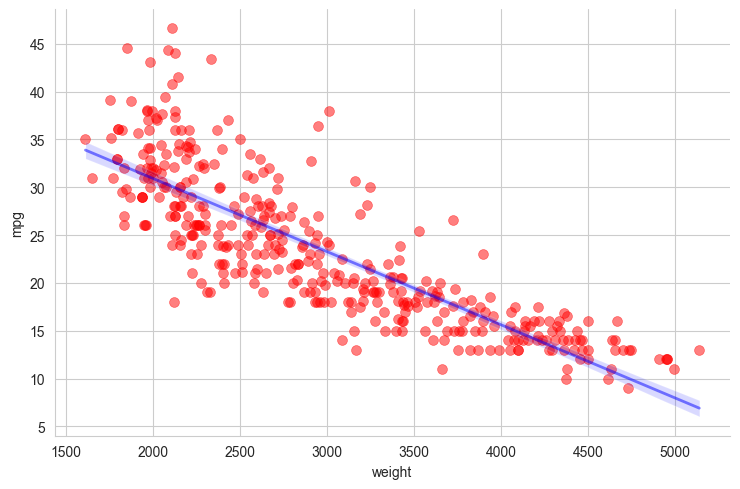

In [282]:
# scatter plot weight vs mpg with a regression line
sns.lmplot(
    x="weight",
    y="mpg",
    data=df_auto,
    height=5,
    aspect=1.5,
    scatter_kws={"color": "red", "alpha": 0.5, "linewidth": 0.5, "s": 50}, 
    line_kws={"color": "blue", "alpha": 0.5, "linewidth": 2}, 
)

### Here we can see that there is an obvious trend, implying a coorelation between the response variable (MPG) and the predictor variable (weight). The heavier the car, the worst the fuel consumption is. The slope of the line quantifies this relationship, with a steep slope indicating a strong relationship between the two variables.
### With all that in mind, there are some outliers, this is due to the fact that the weight of the car is not the only factor that affects the fuel consumption. The engine size, the number of cylinders, the type of fuel, the aerodynamics of the car, the type of transmission, the type of tires, etc. are all factors that affect the fuel consumption. But we are not going to take them into account in this case, for the sake of simplicity.

In [283]:
r, p = pearsonr(df_auto['weight'], df_auto['mpg'])
print(f'The correlation coefficient between weight and mpg is {r:.2f}.')

The correlation coefficient between weight and mpg is -0.83.


## Conclusion:
### The value of r = -0.83 indicates a strong negative correlation between the two variables. The closer the value is to -1, the stronger the negative relationship between the two variables. Which proves our hypothesis to a certain extent.